In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

In [2]:
os.chdir("/Users/mac/Desktop//")

In [3]:
T1 = pd.read_csv("covid_19_india.csv")

In [4]:
T1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
T1= T1.drop('Time',axis=1)

In [6]:
T1.dtypes

Sno                          int64
Date                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [7]:
T1= T1.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [8]:
T1['Date']=T1['Date'].str.replace("-","")

In [9]:
T1.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,20200130,Kerala,0,0,1
1,2,20200131,Kerala,0,0,1
2,3,20200201,Kerala,0,0,2
3,4,20200202,Kerala,0,0,3
4,5,20200203,Kerala,0,0,3


In [10]:
T1['Date']=T1['Date'].astype(int)

In [11]:
T1.dtypes

Sno                      int64
Date                     int64
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

In [12]:
T1['State/UnionTerritory']=T1['State/UnionTerritory'].astype('category').cat.codes

In [13]:
T1.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,20200130,22,0,0,1
1,2,20200131,22,0,0,1
2,3,20200201,22,0,0,2
3,4,20200202,22,0,0,3
4,5,20200203,22,0,0,3


In [14]:
T1.tail()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
18105,18106,20210811,39,638410,3831,650353
18106,18107,20210811,41,77811,773,80660
18107,18108,20210811,44,334650,7368,342462
18108,18109,20210811,43,1685492,22775,1708812
18109,18110,20210811,45,1506532,18252,1534999


In [15]:
T1['State/UnionTerritory']= T1['State/UnionTerritory'].astype(int)

In [16]:
T1.dtypes

Sno                     int64
Date                    int64
State/UnionTerritory    int64
Cured                   int64
Deaths                  int64
Confirmed               int64
dtype: object

In [17]:
cp = T1.corr()

<AxesSubplot:>

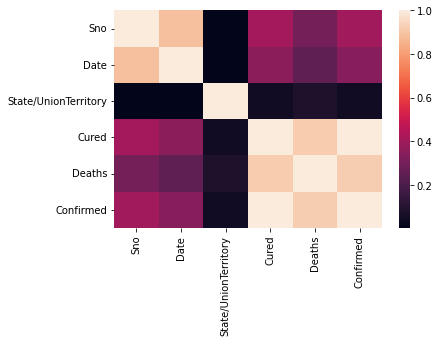

In [18]:
sns.heatmap(cp)

In [19]:
train, test = train_test_split(T1, test_size=0.2)

In [20]:
train.head()

,Sno,Date,State/UnionTerritory,Cured,Deaths,Confirmed
13622,13623,20210409,16,61902,1096,67511
2320,2321,20200526,19,148,4,377
15744,15745,20210607,14,788293,9933,816234
6589,6590,20200923,37,2009,29,2594
16947,16948,20210710,33,906519,4476,935136


In [21]:
### Decision Tree Regression ###

Model = tree.DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,0:5],train.iloc[:,5])

In [22]:
predictions = Model.predict(test.iloc[:,0:5])

In [23]:
predictions

array([  73320.23198276, 2039619.10951009,   73320.23198276, ...,
        750000.93019943,   73320.23198276,   73320.23198276])

In [24]:
T5 = test.iloc[:,5]

In [25]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape


In [26]:
MAPE(T5, predictions) * 100

inf

In [27]:
### Random Forest Regression ###

RFModel = RandomForestRegressor(n_estimators=100).fit(train.iloc[:,0:5],train.iloc[:,5])

In [28]:
RFPredictions = RFModel.predict(test.iloc[:,0:5])

In [29]:
def MAPE(y_true,y_pred):
    mape = np.mean(np.abs((y_true-y_pred)/y_true))
    return mape


In [30]:
MAPE(T5, RFPredictions)

inf

In [31]:
RFPredictions

array([6.94274000e+03, 3.17017744e+06, 3.34247000e+03, ...,
       8.24881490e+05, 2.50400000e+01, 1.36700000e+01])

In [32]:
train.iloc[:,5]

13622     67511
2320        377
15744    816234
6589       2594
16947    935136
          ...  
4176      41383
4696       3298
11213    939387
11113      4363
7183     154785
Name: Confirmed, Length: 14488, dtype: int64

In [33]:
### Linear Regression ###

import statsmodels.api as sm

In [34]:
Model1 = sm.OLS(train.iloc[:,5],train.iloc[:,0:5]).fit()

In [35]:
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Confirmed   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          7.928e+05
Date:                Thu, 11 Nov 2021   Prob (F-statistic):                        0.00
Time:                        19:23:19   Log-Likelihood:                     -1.7520e+05
No. Observations:               14488   AIC:                                  3.504e+05
Df Residuals:                   14483   BIC:                                  3.504e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Sno                     -0.5181      0.077     -6.730      0.000      -0.669      -0.367
Date                     0.0004   4.71e-05      8.180      0.000       0.000       0.000
State/UnionTerritory    47.9371     26.742      1.793      0.073      -4.481     100.355
Cured                    1.0512      0.002    668.572      0.000       1.048       1.054
Deaths                   0.9476      0.085     11.131      0.000       0.781       1.114
==============================================================================
Omnibus:                    15551.651   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1692591.513
Skew:                           5.329   Prob(JB):                         0.00
Kurtosis:                      54.868   Cond. No.                     1.51e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
predictions = Model.predict(test.iloc[:,0:5])

In [37]:
predictions

array([  73320.23198276, 2039619.10951009,   73320.23198276, ...,
        750000.93019943,   73320.23198276,   73320.23198276])